# Introduction to unsupervised learning 

Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.


## Homework #2

This colaboratory also contains Homework #2 which is due **March 5 midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

**NB! Links to your colaboratory will not be accepted as a solution!**

### Setup: 
Here we will load necessary libraries (NumPy, Pandas and loading and visualising MNIST handwritten digits 

In [1]:
# The three giants on which everything else is built
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Ready made stuff lives here:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

# We don't like warnings
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# For plotting like a pro
!pip install plotnine
from plotnine import *

# Not sure why we need this
import os

# MNIST lives here:
from tensorflow.examples.tutorials.mnist import input_data

C:\Users\Mykhaylo_Manukyan\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Mykhaylo_Manukyan\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Mykhaylo_Manukyan\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)]

# Curse of dimensionality (part I)
Distances in high dimensional spaces become more similar (MNIST example)

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
images = np.vstack([img.reshape(-1,) for img in mnist.train.images])
labels = mnist.train.labels
print(f"images are of shape: {images.shape} and labels: {labels.shape}")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
images are of shape: (55000, 784) and labels: (55000,)


In [3]:
def dist(img1, img2):
  return( np.sqrt(np.sum(np.abs(img1 - img2)**2)))

In [4]:
train_images = images[0:2000,:]
train_labels = labels[0:2000]

test_images = images[2000:3000,:]
test_labels = labels[2000:3000]

Let's calculate euclidean distances between all images in the training data and store them in a matrix

In [5]:
distanceMatrix = np.array([np.linalg.norm(image - train_images[:,None], axis=-1) for image in train_images]).reshape((2000,2000))
distanceMatrix[np.diag_indices(distanceMatrix.shape[0])] = float('inf')

In case you were wondering how efficient `numpy` implementations comparing to naïve handmade code, running the following cell can give you some idea. If self-torture is not your thing, skip it.

In [6]:
distanceMatrix = np.zeros((len(train_images), len(train_images)))

for i in np.arange(len(train_images)):
  for j in np.arange(len(train_images)):
    if i == j:
      distanceMatrix[i,j] = float('inf')
    else:
      distanceMatrix[i,j] = dist(train_images[i], train_images[j])

Here comes weirdly looking and hard to understand code that takes a random image from `train_images` and prints out a series of images that are closest in the euclidean space. Play around with the output by re-running this cell miltiple times.

[1493]


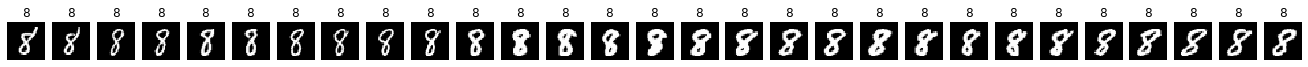

In [7]:
plt.rcParams['figure.figsize'] = (24.0, 12.0) # set default size of plots
# "Names" of classes:
classes =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

start_id = np.random.choice(np.arange(len(train_images)), 1, replace=False)
#start_id = 1370 # an interesting case
print(start_id)
n_images = 30

plt.subplot(1, 1, 1)
plt.imshow(train_images[start_id].reshape((28, 28)), plt.get_cmap('gray'))
plt.axis('off')

curr_id = start_id
idx = np.zeros(n_images)
idx[0] = curr_id
new_id = -1

for i in (np.arange(n_images-1)+1):
  plt_idx = i
  plt.subplot(1, n_images, (plt_idx + 1))
  closest_idx = np.argsort(distanceMatrix[:,curr_id].flatten())
  
  for j in closest_idx:
    if not j in idx:
      new_id = j
      break
  
  if new_id == -1:
    break

  plt.imshow(train_images[new_id].reshape((28, 28)), plt.get_cmap('gray'))
  plt.axis('off')
  plt.title(train_labels[new_id])
  curr_id = new_id
  idx[i] = curr_id
  new_id = -1

plt.show()

Next we can see couple of images that are on the equal distances from each other in the euclidean space

C:\Users\Mykhaylo_Manukyan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


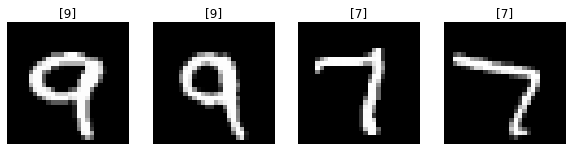

In [8]:
ids = np.argwhere(np.round(distanceMatrix[0,:], 1) == 8.6)

plt.rcParams['figure.figsize'] = (10, 8.0) # set default size of plots

for i in np.arange(len(ids)):
  plt_idx = i
  plt.subplot(1, len(ids), plt_idx + 1)
  plt.imshow(train_images[ids[i]].reshape((28, 28)), plt.get_cmap('gray'))
  plt.axis('off')
  plt.title(train_labels[ids[i]])

plt.show()

# Curse of dimensionality (part II)
Here we will illustrate how increasing the dimensionality of your data (adding more features) may impact the performance of the machine learning model.

We generate 100 points from 50 dimensional Gaussian distribution. Fifty points are generated from a distribution centered at 1 and another fifty from a distribution with a centre in 0.

In [9]:
np.random.seed(2342347823) # random seed for consistency

D = 50

# Generating 50 points for the first class
mu_vec1 = np.zeros(D) 
cov_mat1 = np.eye(D) # creates a diagonal matrix of size D x D, all values except diagonal are 0
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 50)

# Generating 50 points for the second class
mu_vec2 = np.ones(D)
cov_mat2 = np.eye(D)
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 50)

Combine two samples together into one dataset

In [10]:
train = np.concatenate((class1_sample, class2_sample), axis=0)
train_data = pd.DataFrame(train)

# Create names for columns, x1, x2 ... x50
train_data.columns = [ 'x' + str(i) for i in (np.arange(D)+1)]

# Create a class column
train_data['class'] = np.concatenate((np.repeat(0, 50), np.repeat(1, 50)))

# This is important for plotting and modelling
train_data['class'] = train_data['class'].astype('category')

Divide this dataset into two sets: training set (60%) and validation set (40%). As we have done in the previous practice.

In [11]:
##### YOUR CODE STARTS #####
train = train_data[:int(0.6*(len(train_data)))]
val = train_data[int(0.6*(len(train_data))):]
##### YOUR CODE ENDS ##### (please do not delete this line)

Visualise training data

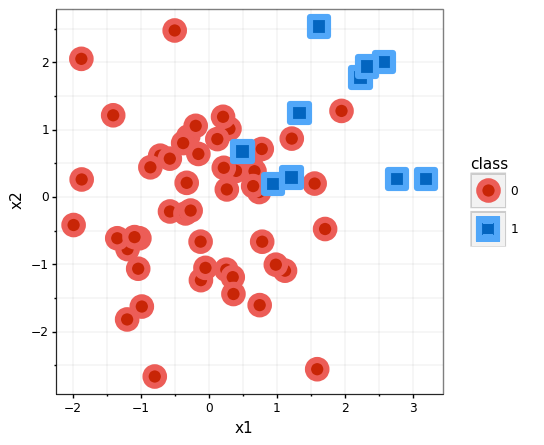

<ggplot: (-9223371916043485510)>

In [12]:
fig = (
    ggplot(data = train,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig 

There are way more instances on the class 0 than instances of class 1. What is wrong?

In [13]:
from sklearn.model_selection import train_test_split
##### YOUR CODE STARTS #####
train, val = train_test_split(train_data, random_state = 111, test_size=0.4) 
##### YOUR CODE ENDS ##### (please do not delete this line)

Visualise the training data again to make sure that now we managed to get balanced representation

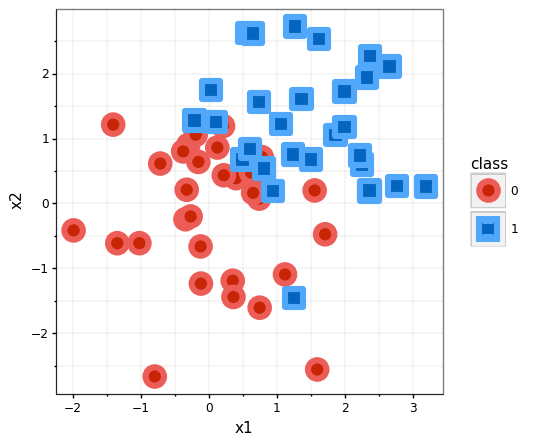

<ggplot: (120811379383)>

In [14]:
fig = (
    ggplot(data = train,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig 

Well done! What about the validation set?

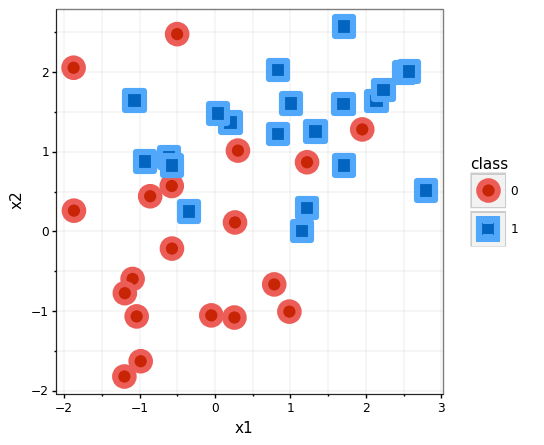

<ggplot: (120811426757)>

In [15]:
fig = (
    ggplot(data = val,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig 

Let's see how the Decision Tree algorithm can cope with this data. Let's import the Decision Tree from the `sklearn` package.

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5) 

Train a DecisionTreeClassifier on 2D data and test it on validation data (we shall not use CV algorithm in this case to save time)

In [17]:
# 2D data
##### YOUR CODE STARTS #####
model.fit(train[['x1', 'x2']], train['class'] )
val_accuracy = np.sum(model.predict(val[['x1', 'x2']]) == val['class'])/len(val)
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f"Validation accuracy is {val_accuracy*100}%")

Validation accuracy is 80.0%


Now let's do the same for 5D and 50D data

In [18]:
##### YOUR CODE STARTS #####
# 5D data
model.fit(train[['x1', 'x2', 'x3', 'x4', 'x5']], train['class'] )
val_accuracy = np.sum(model.predict(val[['x1', 'x2', 'x3', 'x4', 'x5']]) == val['class'])/len(val)
print(f"Validation accuracy is {val_accuracy*100}%")
##### YOUR CODE ENDS ##### (please do not delete this line)

Validation accuracy is 72.5%


In [19]:
##### YOUR CODE STARTS #####
# 50D data
model.fit(train.drop(columns=['class']), train['class'] )
val_accuracy = np.sum(model.predict(val.drop(columns=['class'])) == val['class'])/len(val)
print(f"Validation accuracy is {val_accuracy*100}%")
##### YOUR CODE ENDS ##### (please do not delete this line)

Validation accuracy is 67.5%


What is going on here? Let's visualise our validation set along with predicted classes.

In [20]:
model.fit(train[['x1','x2']], train['class'])

# 2D data
validation_accuracy = np.sum(model.predict(val[['x1','x2']]) == val['class'])/val.shape[0]
print(f"Validation accuracy is {validation_accuracy*100}%")

val['predicted'] = model.predict(val[['x1','x2']])
val['predicted'] = val['predicted'].astype('category')

Validation accuracy is 80.0%


C:\Users\Mykhaylo_Manukyan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Mykhaylo_Manukyan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


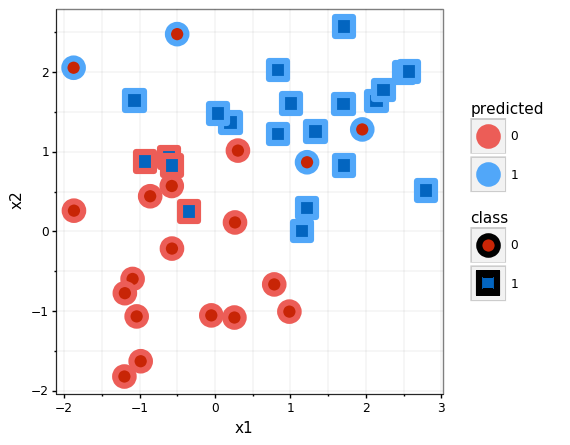

<ggplot: (120811484350)>

In [21]:
fig = (
    ggplot(data = val,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'predicted', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig 

# Curse of dimensionality (part III)
The assumption is that under the curse of dimensionality the expected smallest distance between points increases (points in high-dimensional space are further apart) exponentially with number of dimensions. Here we will try to demonstrate this phenomenon experimentaly. 

Let's sample 14 points from 1D uniform distribution:


In [22]:
oneD = np.random.rand(14,1)*6 # here I multiply by 6 just to force values into a range from 0 to 6

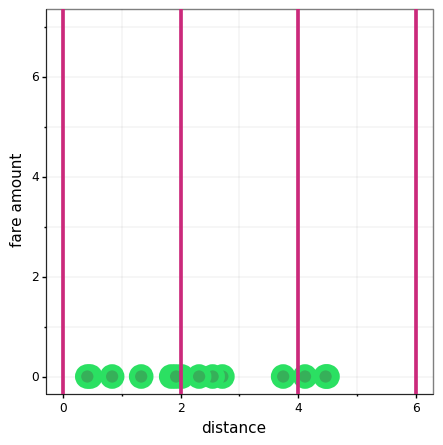

<ggplot: (-9223371916043278115)>

In [23]:
# Converting oneD into pandas DataFrame before visualising
example_data = pd.DataFrame({'x':np.transpose(oneD)[0], 'y':np.zeros_like(np.transpose(oneD)[0])})

fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'distance',
        y = 'fare amount',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    geom_vline( xintercept = (0, 2, 4, 6), color="#CB297B", size=1.5) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig 

Again sampling 14 points, now from uniform 2D distribution

In [24]:
twoD = np.random.rand(14,2)*6

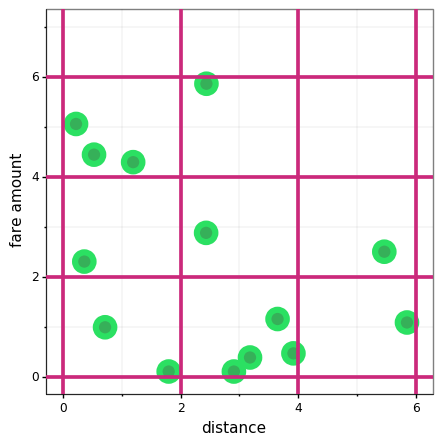

<ggplot: (120811569107)>

In [25]:
example_data = pd.DataFrame({'x':np.transpose(twoD)[0], 'y':np.transpose(twoD)[1]})
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'distance',
        y = 'fare amount',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    geom_vline( xintercept = (0, 2, 4, 6), color="#CB297B", size=1.5) + 
    geom_hline( yintercept = (0, 2, 4, 6), color="#CB297B", size=1.5) +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

Let's calculate and compare minimum dsistances between points in 1D and 2D.

In [26]:
oneD_distances = np.array([np.linalg.norm(point - oneD[:,None], axis=-1) for point in oneD])
print(oneD_distances.shape)
print(oneD_distances[:5,:5])

(14, 14, 1)
[[[0.        ]
  [1.72489873]
  [1.90687956]
  [2.41845579]
  [1.8236312 ]]

 [[1.72489873]
  [0.        ]
  [0.18198083]
  [0.69355707]
  [0.09873247]]

 [[1.90687956]
  [0.18198083]
  [0.        ]
  [0.51157623]
  [0.08324836]]

 [[2.41845579]
  [0.69355707]
  [0.51157623]
  [0.        ]
  [0.59482459]]

 [[1.8236312 ]
  [0.09873247]
  [0.08324836]
  [0.59482459]
  [0.        ]]]


We will use `triu_indices` function (with an offset 1 from the main diagonal) to extract upper triangle of the distance matrix and take minimum of these

In [27]:
##### YOUR CODE STARTS #####
min1D_distance = np.min(oneD_distances[np.triu_indices(len(oneD_distances), k=1)])
##### YOUR CODE ENDS ##### (please do not delete this line)
print(min1D_distance)

0.0319748622435343


Let's do the same procedure for 2D points (`twoD`):

In [28]:
##### YOUR CODE STARTS #####
twoD_distances = np.array([np.linalg.norm(point - twoD[:,None], axis=-1) for point in twoD])
min2D_distance = np.min(twoD_distances[np.triu_indices(len(twoD_distances), k=1)])
##### YOUR CODE ENDS ##### (please do not delete this line)
print(min2D_distance)

0.39255750323880223


It has increased by at least one order of magnitude!

Make a function that samples a given number of points with a fixed number of dimensions from the random distribution and then calculates the minimum distance between these points (copy and paste from already created code).

In [29]:
##### YOUR CODE STARTS #####
def compute_min_distance(n_points, n_dimensions):
  points = np.random.rand(n_points,n_dimensions)*6
  distances = np.array([np.linalg.norm(point - points[:,None], axis=-1) for point in points])
  min_distance = np.min(distances[np.triu_indices(len(distances), k=1)])
  return(min_distance)
##### YOUR CODE ENDS ##### (please do not delete this line)


What about minimum smallest distance between points in 3D space?

In [30]:
min3D_distance = compute_min_distance(14, 3)
print(min3D_distance)

0.798420069201549


## Homework exercise 1 (3 points): Curse of dimensionality applied to sampling density

<font color='red'>**(a)** When dealing with sampling random distributions one needs to be careful as variation between samples can be very large. Compute minimum distance in each space (1D, 2D and 3D) at least 1000 times. Store minimum distances from each space in its own variable (mins1D, mins2D and mins3D). For each space report the average smallest distance and confirm that these distances grow with number of dimensions. **(1 point)** </font> 

In [31]:
##### YOUR CODE STARTS #####
n_runs = 1000
mins1D = []
mins2D = []
mins3D = []

mins1D = [compute_min_distance(14, 1) for n in range (0, n_runs)]
mins2D = [compute_min_distance(14, 2) for n in range (0, n_runs)]
mins3D = [compute_min_distance(14, 3) for n in range (0, n_runs)]

##### YOUR CODE ENDS ##### (please do not delete this line)

print(f'the average smallest distance in 1D is {np.mean(mins1D)}')
print(f'the average smallest distance in 2D is {np.mean(mins2D)}')
print(f'the average smallest distance in 3D is {np.mean(mins3D)}')

the average smallest distance in 1D is 0.03249110455410721
the average smallest distance in 2D is 0.3181558649580039
the average smallest distance in 3D is 0.7722853425220708


<font color='red'>**(b)** According to elements of statistical learning (https://web.stanford.edu/~hastie/Papers/ESLII.pdf), sampling density is proportional to N^D. Therefore If we want to have the same expected smallest distance between points in 2D as we had in 1D space with 14 points (~0.02), we would need to generate 14^2 points (196 points) in 2D or 14^3 in 3D. Test this hipothesis by sampling corresponding number of points in each space and calculating the average smallest distances. (2 points) </font>


NB! probably it makes sense to decrease the number of runs to ~100.

In [32]:
##### YOUR CODE STARTS #####
n_runs = 100
mins1D = []
mins2D = []
mins3D = []

for i in np.arange(n_runs):
    mins1D.append(compute_min_distance(14, 1))
    mins2D.append(compute_min_distance(14**2, 2))
    mins3D.append(compute_min_distance(14**3, 3))
  
##### YOUR CODE ENDS ##### (please do not delete this line)

print(f'the average smallest distance in 1D is {np.mean(mins1D)}')
print(f'the average smallest distance in 2D is {np.mean(mins2D)}')
print(f'the average smallest distance in 3D is {np.mean(mins3D)}')


the average smallest distance in 1D is 0.03146351702510072
the average smallest distance in 2D is 0.021714929870963465
the average smallest distance in 3D is 0.019476383074890028


<font color='red'>**(c)** Comment on obtained results. (1 point) </font>

Answer to **(c)**: From execution results we could see that indeed with increase of number of samples by $N^D$ we are able to get approximately same smallest distance between points (~0.02). For 2D and 3D datasets even smallest distance is less than for 1D. It shows that sampling from 2D and 3D datasets has much better density and as result are closer to each other (no sparsity). 

Also, I could conclude here that if dimensionality of initial data is big one and amount of samples is not - reducing dimensionality  will help to improve accuracy since it will allow to get more dense distribution with same amount of points.

Go to the slides!

# Principle Component Analysis (toy data)
Generate data from the lecture slides

In [33]:
Z = pd.DataFrame({'x':[1,2,3,4,5], 'y':[2,4,5,4,5]})

# Centering both features
Z.x = Z.x - Z.x.mean()
Z.y = Z.y - Z.y.mean()

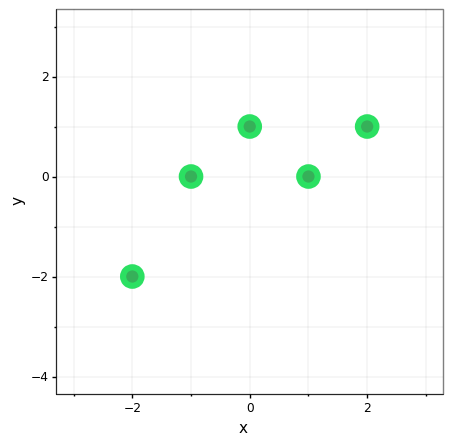

<ggplot: (120811541263)>

In [34]:
fig = (
    ggplot(data = Z,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    xlim(-3, 3) +
    ylim(-4, 3) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

Transpose the matrix of original coordinates

In [35]:
Z = np.matrix(Z)
Z_t = Z.T
print(Z)
print(Z_t)

[[-2. -2.]
 [-1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 2.  1.]]
[[-2. -1.  0.  1.  2.]
 [-2.  0.  1.  0.  1.]]


Compute covariance matrix

In [36]:
##### YOUR CODE STARTS #####
S = np.dot(Z_t, Z)/4
##### YOUR CODE ENDS ##### (please do not delete this line)
print(S)

[[2.5 1.5]
 [1.5 1.5]]


Perform eigendecomposition using `linalg.eig` function from `numpy`

In [37]:
 w, v = np.linalg.eig(S)
 print(w)
 print(-1*v)

[3.58113883 0.41886117]
[[-0.81124219  0.58471028]
 [-0.58471028 -0.81124219]]


Transform transposed matrix of original coordinates into the space of principle components.

In [38]:
Z_new = np.matmul((-1*v).T, Z_t) # we need to transpose eigenvectors here due to implementation details of linalg.eig

# Make it actually look nice
Z_new_pd = pd.DataFrame({'PC1':np.array(Z_new)[0], 'PC2':np.array(Z_new)[1]})
print(Z_new_pd)

        PC1       PC2
0  2.791905  0.453064
1  0.811242 -0.584710
2 -0.584710 -0.811242
3 -0.811242  0.584710
4 -2.207195  0.358178


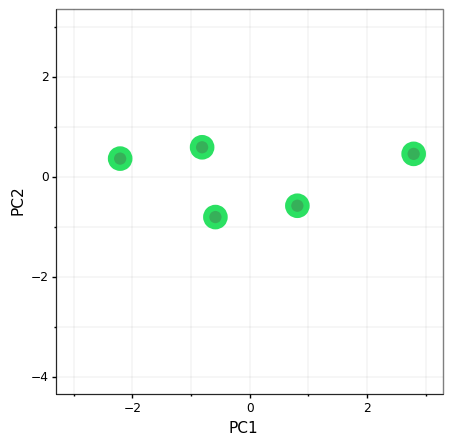

<ggplot: (-9223371916043235489)>

In [39]:
fig = (
    ggplot(data = Z_new_pd,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    xlim(-3, 3) +
    ylim(-4, 3) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

## PCA with `sklearn`
Of course, you guessed it, `sklearn` can do it for you.

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #choose the number of components = number of original dimensions

# use PCA on our data
pca.fit(Z)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [41]:
##### YOUR CODE STARTS #####
pca_w = np.matrix(pca.components_)
pca_v = pca.explained_variance_
##### YOUR CODE ENDS ##### (please do not delete this line)

print(pca_v)
print(pca_w)

[3.58113883 0.41886117]
[[-0.81124219 -0.58471028]
 [-0.58471028  0.81124219]]


Transform the original matrix with `sklearn` derived values:

In [42]:
##### YOUR CODE STARTS #####
# note that here we don't need to transpose eigenvectors
Z_new = np.dot(pca_w, Z_t)
##### YOUR CODE ENDS ##### (please do not delete this line)

Z_new_pd = pd.DataFrame({'PC1':np.array(Z_new)[0], 'PC2':(-1*np.array(Z_new)[1])})
print(Z_new_pd)

        PC1       PC2
0  2.791905  0.453064
1  0.811242 -0.584710
2 -0.584710 -0.811242
3 -0.811242  0.584710
4 -2.207195  0.358178


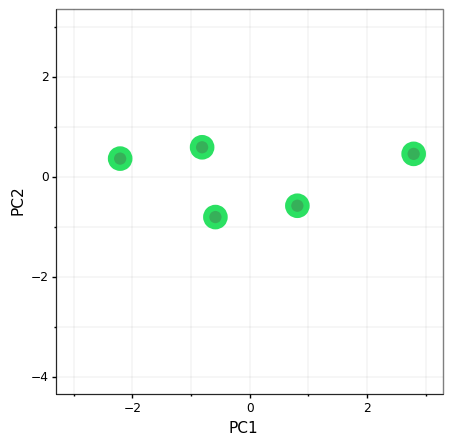

<ggplot: (120811568904)>

In [43]:
fig = (
    ggplot(data = Z_new_pd,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    xlim(-3, 3) +
    ylim(-4, 3) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

## Shorter way to use PCA from `sklearn`

In [44]:
pca = PCA(n_components=2)
Z_new = pca.fit_transform(Z).T

That is it :)

In [45]:
Z_new_pd = pd.DataFrame({'PC1':np.array(Z_new)[0], 'PC2':(-1*np.array(Z_new)[1])})
print(Z_new_pd)

        PC1       PC2
0  2.791905  0.453064
1  0.811242 -0.584710
2 -0.584710 -0.811242
3 -0.811242  0.584710
4 -2.207195  0.358178


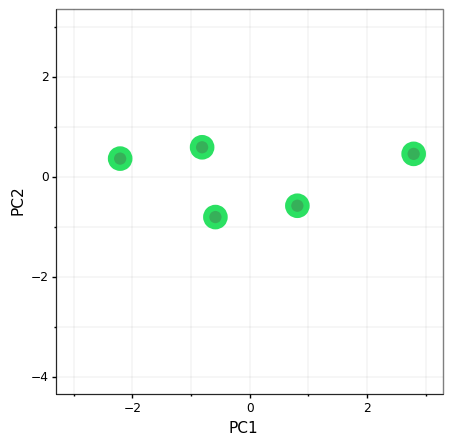

<ggplot: (-9223371916041019676)>

In [46]:
fig = (
    ggplot(data = Z_new_pd,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    xlim(-3, 3) +
    ylim(-4, 3) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

Let's go back to the lecture! Come back here after the variance explained slides.

# PCA can improve ML performance on high-dimensional data
Let's see how PCA can help us first to compress the original 50D data and secondly enable the Decision Tree algorithm perform better.

First, some simple preprocessing.


In [47]:
# we need to drop class variable (we will still have it stored in train)
train_Z = train.drop('class', axis = 1)

# subtract mean from each column
train_Z = train_Z - train_Z.mean()

Let's do the PCA on training data

In [48]:
pca = PCA(n_components=D)

# Fit PCA on train_Z
pca.fit(train_Z)

# Transform the original coordinates into PC space
train_Z_new = np.matmul(pca.components_, train_Z.T)

## Quantifying variance explained by PCs

Here, we will try to estimate the number of principle components that are needed to explain 90% of variance (read information) in our data. Let's print out `explained_variance_` attribute of our `pca` object.

In [49]:
print(np.round(pca.explained_variance_, 3))

[13.688  3.822  3.196  2.817  2.634  2.57   2.459  2.157  2.069  2.007
  1.821  1.691  1.564  1.477  1.466  1.451  1.337  1.223  1.194  1.107
  1.011  0.919  0.806  0.757  0.706  0.674  0.66   0.561  0.499  0.473
  0.436  0.395  0.366  0.35   0.285  0.276  0.252  0.201  0.185  0.171
  0.156  0.137  0.101  0.093  0.073  0.046  0.037  0.034  0.018  0.015]


We can divide each value by the sum of all variances to figure out the precentages

In [50]:
##### YOUR CODE STARTS #####
print(pca.explained_variance_/np.sum(pca.explained_variance_))
##### YOUR CODE ENDS ##### (please do not delete this line)

[0.21920591 0.0612082  0.05117668 0.04510446 0.0421748  0.04115086
 0.03937675 0.0345447  0.03313117 0.03214334 0.02916591 0.02707904
 0.02504891 0.02365608 0.02347172 0.02324468 0.02141911 0.01958392
 0.01912539 0.01772938 0.01619456 0.01471943 0.01290334 0.01212431
 0.01131381 0.01079095 0.01056248 0.00898503 0.00799575 0.00756797
 0.00697551 0.00633311 0.00585615 0.00560654 0.00456568 0.00441838
 0.00404325 0.00321585 0.00296428 0.00274026 0.00249262 0.00219565
 0.00162499 0.00149236 0.00117355 0.00073054 0.0005944  0.00055119
 0.00029167 0.0002354 ]


Or we can use a handy attribute `explained_variance_ratio_` to avoid this pain.

In [51]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.219 0.061 0.051 0.045 0.042 0.041 0.039 0.035 0.033 0.032 0.029 0.027
 0.025 0.024 0.023 0.023 0.021 0.02  0.019 0.018 0.016 0.015 0.013 0.012
 0.011 0.011 0.011 0.009 0.008 0.008 0.007 0.006 0.006 0.006 0.005 0.004
 0.004 0.003 0.003 0.003 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001
 0.    0.   ]


How many PCs need to be retained in order to explain 90% or more variance of the original data?

In [52]:
variances = pca.explained_variance_ratio_
##### YOUR CODE STARTS #####
# com_vars = np.cumsum(variances)
com_vars = [np.sum(variances[:i]) for i in np.arange(len(variances))+1]
print(np.round(com_vars, 3))
smallest_pc_num = np.min(np.where(np.array(com_vars) > 0.9))
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f'The smallest number of PCs that explain more than 90% of variance is {smallest_pc_num} out of {len(pca.explained_variance_ratio_)}')

[0.219 0.28  0.332 0.377 0.419 0.46  0.499 0.534 0.567 0.599 0.628 0.655
 0.681 0.704 0.728 0.751 0.772 0.792 0.811 0.829 0.845 0.86  0.873 0.885
 0.896 0.907 0.917 0.926 0.934 0.942 0.949 0.955 0.961 0.967 0.971 0.976
 0.98  0.983 0.986 0.989 0.991 0.993 0.995 0.996 0.998 0.998 0.999 0.999
 1.    1.   ]
The smallest number of PCs that explain more than 90% of variance is 25 out of 50


Let's first visualise first two principle components

In [53]:
train_Z_new = pd.DataFrame({'PC1':np.array(train_Z_new)[0], 'PC2':np.array(train_Z_new)[1], 'class': train['class']})

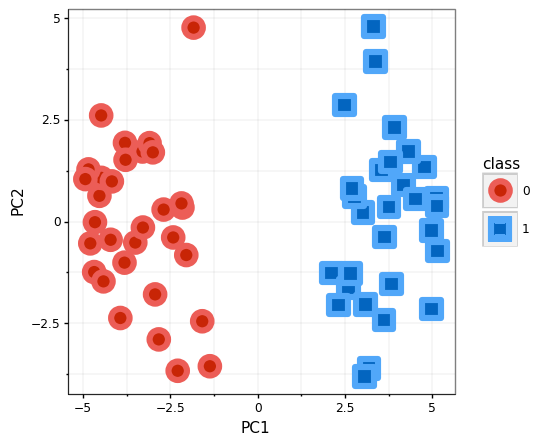

<ggplot: (120813816808)>

In [54]:
fig = (
    ggplot(data = train_Z_new,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig 

Performing with validation set all the same operations we performed on train

In [55]:
val_Z = val.drop(['class', 'predicted'], axis = 1)
val_Z = val_Z - val_Z.mean()
val_Z_new = np.matmul(pca.components_, val_Z.T)
val_Z_new = pd.DataFrame({'PC1':np.array(val_Z_new)[0], 'PC2':np.array(val_Z_new)[1], 'class': val['class']})

Now we can train the model and test its accuracy on validation set

In [56]:
model = DecisionTreeClassifier(max_depth = 5) 
model.fit(train_Z_new[['PC1','PC2']], train_Z_new['class'])

val_accuracy = np.sum(model.predict(val_Z_new[['PC1','PC2']]) == val_Z_new['class'])/val_Z_new.shape[0]
print(f"Validation accuracy is {val_accuracy*100}%")

Validation accuracy is 100.0%


Wow, that is impressive, but kinda unbelievable, let's visualise! (seeing is believing)

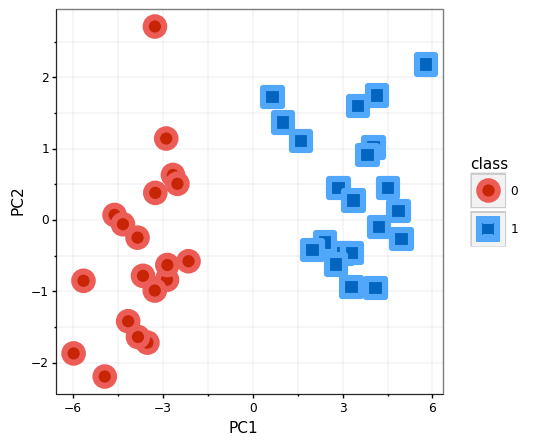

<ggplot: (120813751549)>

In [57]:
fig = (
    ggplot(data = val_Z_new,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig 

Not bad!

### Getting our raw data back after PCA

In [58]:
# Conventional PCA
train_Z_new = pca.fit_transform(train_Z).T

##### YOUR CODE STARTS #####
train_Z_original = np.dot(np.matrix(pca.components_).T, train_Z_new).T
##### YOUR CODE ENDS ##### (please do not delete this line)

print(np.round(train_Z_original, 2)[:5,:5])
np.matrix(np.round(train_Z, 2))[:5,:5]

[[ 0.   -2.09  1.02 -0.83  0.21]
 [-0.35 -0.1   0.78 -1.48 -2.33]
 [-0.86 -1.72 -0.39 -0.5  -0.67]
 [ 0.61  1.12  0.94  0.84  1.5 ]
 [ 0.52  2.24 -0.06  0.9   0.45]]


matrix([[ 0.  , -2.09,  1.02, -0.83,  0.21],
        [-0.35, -0.1 ,  0.78, -1.48, -2.33],
        [-0.86, -1.72, -0.39, -0.5 , -0.67],
        [ 0.61,  1.12,  0.94,  0.84,  1.5 ],
        [ 0.52,  2.24, -0.06,  0.9 ,  0.45]])

## Homework exercise 2 (7 points): PCA on MNIST

<font color='red'>**(a)** Perform a PCA (you can use sklearn) on MNIST data. (1 point)

In [59]:
# Centring
train_images = pd.DataFrame(np.matrix(train_images))
train_images = train_images - train_images.mean()

test_images = pd.DataFrame(np.matrix(test_images))
test_images = test_images - test_images.mean()

In [60]:
##### YOUR CODE STARTS #####
pca = PCA()
train_images_new = pca.fit_transform(train_images).T

##### YOUR CODE ENDS ##### (please do not delete this line)
print(train_images_new.shape) # this should be (784, 2000)

(784, 2000)


<font color='red'>**(b)** Plot PCA on MNIST, colour dots based on their class.
(1 point) </font>

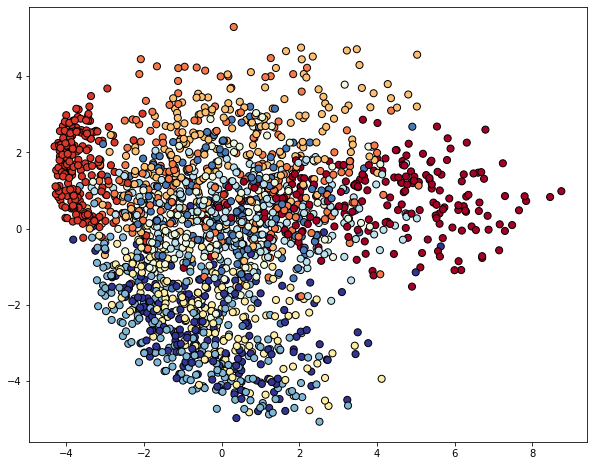

In [61]:
##### YOUR CODE STARTS #####
visualise_train = pd.DataFrame({'PC1':np.array(train_images_new)[0], 'PC2':np.array(train_images_new)[1]})
##### YOUR CODE ENDS ##### (please do not delete this line)

cm = plt.cm.get_cmap('RdYlBu')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

plt.scatter(visualise_train.PC1, visualise_train.PC2, s=50, edgecolors = 'black', cmap=cm, c=train_labels)
plt.show()

<font color='red'>**(c)** Estimate number of principle components that heed to be retained. (1 point)
</font>

In [62]:
##### YOUR CODE STARTS #####
variances = pca.explained_variance_ratio_
# com_vars = [np.sum(variances[:i]) for i in np.arange(len(variances))+1]
com_vars = np.cumsum(variances)
print(com_vars)
n_pc = np.min(np.where(np.array(com_vars) > 0.9))
##### YOUR CODE ENDS ##### (please do not delete this line)
print(n_pc)

[0.11102763 0.18544838 0.2508613  0.30958843 0.35728142 0.4017196
 0.4343593  0.46369302 0.49107242 0.5154179  0.53638726 0.55645794
 0.5739761  0.59081787 0.6067114  0.6213128  0.6340811  0.64617085
 0.65783924 0.6685621  0.6786801  0.6885214  0.6982146  0.7072491
 0.7155655  0.7234311  0.7311355  0.7385595  0.7453644  0.75208765
 0.758524   0.7647278  0.77063406 0.7762394  0.7816499  0.78690654
 0.791817   0.7965887  0.801227   0.80567    0.80991864 0.81398046
 0.8178188  0.8215975  0.8252287  0.82868403 0.8320556  0.8353729
 0.83856004 0.8416622  0.84452987 0.8473437  0.85009456 0.8527172
 0.85530645 0.85782933 0.8602963  0.8626637  0.86498284 0.8672871
 0.8695221  0.8716987  0.8738206  0.8758457  0.87786496 0.87980366
 0.8816827  0.8835328  0.8853299  0.8871065  0.88882667 0.8905118
 0.8921526  0.8937758  0.8953158  0.8968209  0.8983033  0.89975464
 0.9011512  0.90253067 0.90389466 0.9052195  0.9064921  0.9077509
 0.90898013 0.9101771  0.9113485  0.9125079  0.9136478  0.91476965
 0

<font color='red'>**(d)** Run vanila KNN with K = 10 on original data, calculate and report the number of correctly classified test instances. (1 point)
</font>

In [63]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

##### YOUR CODE STARTS #####
model = KNeighborsClassifier(10)
model.fit(train_images, train_labels)

n_correct = np.sum(model.predict(test_images) == test_labels)
##### YOUR CODE ENDS ##### (please do not delete this line)

print(n_correct)

873


<font color='red'>**(e)** Use eigenvectors you obtained with PCA on training data to transform test set and retain as many PCs as you estimated in (c). Now train a KNN classifier with K = 10 on this compressed data. Report the number of correctly classified examples and compare it to KNN model trained on the original data. (1 points)
</font>

In [64]:
model = KNeighborsClassifier(10)
model.fit(train_images_new[0:n_pc,:].T, train_labels)


##### YOUR CODE STARTS #####
# Perform PCA using eigenvectors from the train data 
test_images_new = np.dot(np.matrix(pca.components_), test_images.T)
n_correct = np.sum(model.predict(test_images_new[0:n_pc,:].T) == test_labels)
##### YOUR CODE ENDS ##### (please do not delete this line)

print(n_correct)

884


Number of correctly classified examples after PCA is slightly better than without PCA, but difference is not huge (884 vs. 873).

<font color='red'>**(f)** Compare the performance of the DecisionTreeClassifier trained on original and compressed data. (1 point)
</font>

In [68]:
# At first train DT on the original data 
##### YOUR CODE STARTS #####
model = DecisionTreeClassifier(max_depth=5)
n_correct = np.sum(model.fit(train_images, train_labels).predict(test_images) == test_labels)
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f'On original data DT guessed {n_correct} images')

# Now train DT on PCA tranformed data
##### YOUR CODE STARTS #####
model = DecisionTreeClassifier(max_depth=5)

test_images_new = np.dot(np.matrix(pca.components_), test_images.T)
n_correct = np.sum(model.fit(train_images_new.T, train_labels).predict(test_images_new.T) == test_labels)
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f'On compressed data DT guessed {n_correct} images')

On original data DT guessed 357 images
On compressed data DT guessed 519 images


<font color='red'>**(g)** Shortly answer the following questions (1 point):  
* What are the main advantages of PCA transformation?
* What are its main disadvantages?
* When would you use the transformation and in what cases you wouldn't?
</font>

* What are the main advantages of PCA transformation? <br>
Answer: it allow to reduce dimensionsionality of data which improve accuracy of machine learning algorithms (especially  when number of features is high). Since PCA is based on matrix eigenvalues and eigenvectors decomposition we are able to achieve dimensionality reduction with minor data loss by using only biggest eigenvalues which allow to preserve 90% of data variance. This leads to improved accuracy and reduced computational complexity with a price of little data loss.
* What are its main disadvantages? <br>
Answer: One of the main disadvantages of PCA is after transformation it is not possible to interpret results on a same level as before because you could not explain principal components meaning. They are not related to original features anylonger. Method handles well linear correlation between features and couldn't deal with non-linear correlation. We still lost some part of information as result of PCA, if principal components will be chosen wrongly - data loss could be even higher. PCA result is affected by scale of the data, hence brfore using PCA data need to be scaled, otherwise principal components could be identified wrongly.
* When would you use the transformation and in what cases you wouldn't? <br>
Answer: We could use PCA in cases when we need to perform visualization of data with a lot of features. Since we could only visualize well 2D and 3D data (additional dimensions could be added via encodings like color or size, but still it is a small number of dimensions). Another usecase is when we have a lot of features and very little amount of data (considering also cases when number of features greater than number of samples). In this case PCA could help to increase sample density which will improve algorithms accuracy. Since PCA is based on eigenvalues decomposition I would assume that it will be usefull in case if data has multicolinearity. In such case PCA should help by reducing or removing effects of multicolinearity. <br>
We wouldn't use PCA when we already have just 1 feature - it won't reduce anything in such case. :) Also in case if number of features is small and they are all of simillar importance and uncorrelated between each other - there is no point of doing PCA, it won't bring any impovement. Sinc PCA only able to deal with linear correlation (because it based on eigen  values decomposition), it wouldn't help if data has high non-linear correlation between features. Also, I think PCA could be harmful if data is such that variance within features is higher compare to variance between features (noisy data). In such case it could be that PCA  will preserve noice variance, but will remove important information.

# Clustering


In [69]:
cluster_data = pd.DataFrame({'x':[2,3,3,5,6,7,7], 'y':[7,6,8,5,6,4,6]})

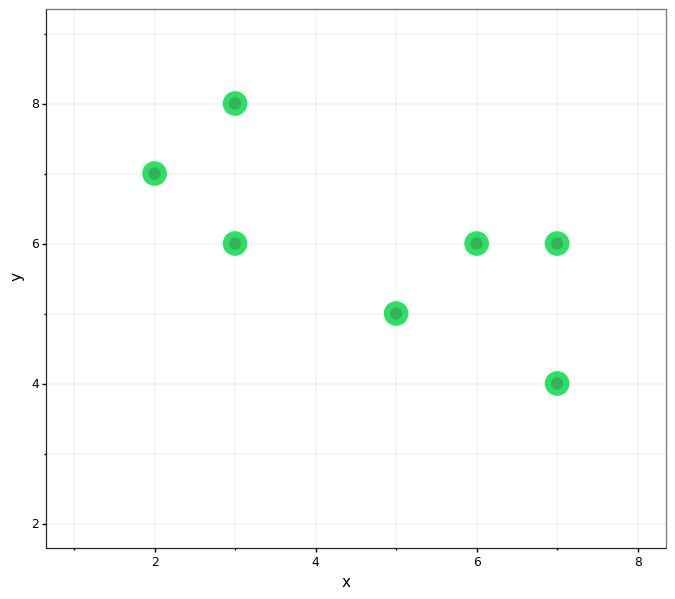

<ggplot: (120813816731)>

In [70]:
fig = (
    ggplot(data = cluster_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    xlim(1, 8) +
    ylim(2, 9) +
    theme_bw() + 
    theme(figure_size = (8, 7),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

### Hierarchical clustering

In [71]:
# We start with every point being in the different cluster
clusters = list([[0], [1], [2], [3], [4], [5], [6]])
print(clusters)

[[0], [1], [2], [3], [4], [5], [6]]


In [72]:
# Calculate proximity matrix between all points
from scipy.spatial.distance import pdist, squareform

distances = pdist(cluster_data, metric='euclidean')
proximity_matrix = squareform(distances)
proximity_matrix[np.diag_indices(proximity_matrix.shape[0])] = float('inf')

In [73]:
np.round(proximity_matrix, 2)

array([[ inf, 1.41, 1.41, 3.61, 4.12, 5.83, 5.1 ],
       [1.41,  inf, 2.  , 2.24, 3.  , 4.47, 4.  ],
       [1.41, 2.  ,  inf, 3.61, 3.61, 5.66, 4.47],
       [3.61, 2.24, 3.61,  inf, 1.41, 2.24, 2.24],
       [4.12, 3.  , 3.61, 1.41,  inf, 2.24, 1.  ],
       [5.83, 4.47, 5.66, 2.24, 2.24,  inf, 2.  ],
       [5.1 , 4.  , 4.47, 2.24, 1.  , 2.  ,  inf]])

Find the coordinates of the smallest distance between points and change the proximity matrix

In [74]:
print(np.min(proximity_matrix))

1.0


In [75]:
# np.where(proximity_matrix == np.min(proximity_matrix))[0]

print(np.argmin(proximity_matrix)//7)
print(np.argmin(proximity_matrix)%7)

4
6


In [76]:
##### YOUR CODE STARTS #####
fcluster = np.argmin(proximity_matrix)//7
scluster = np.argmin(proximity_matrix)%7
##### YOUR CODE ENDS ##### (please do not delete this line)

print(fcluster)
print(scluster)

4
6


In [77]:
print(f'smallest element is {proximity_matrix[fcluster,scluster]} and {proximity_matrix[scluster,fcluster]}, between clusters {fcluster} and {scluster}')

smallest element is 1.0 and 1.0, between clusters 4 and 6


Merge the two clusters (columns and rows of the matrix), preserving the shortest distance to other clusters from this new cluster (single linkage)

In [78]:
# Given
fcluster = 4
scluster = 6

import copy
new_proximity = copy.deepcopy(proximity_matrix)
print(np.round(new_proximity, 2))

[[ inf 1.41 1.41 3.61 4.12 5.83 5.1 ]
 [1.41  inf 2.   2.24 3.   4.47 4.  ]
 [1.41 2.    inf 3.61 3.61 5.66 4.47]
 [3.61 2.24 3.61  inf 1.41 2.24 2.24]
 [4.12 3.   3.61 1.41  inf 2.24 1.  ]
 [5.83 4.47 5.66 2.24 2.24  inf 2.  ]
 [5.1  4.   4.47 2.24 1.   2.    inf]]


In [79]:
# Copy into the fcluster row and column smallest values from both fcluster and scluster
for i in np.arange(proximity_matrix.shape[0]):
  if proximity_matrix[fcluster, i] > proximity_matrix[scluster, i]:
    ##### YOUR CODE STARTS #####
    new_proximity[fcluster, i] = proximity_matrix[scluster, i]
    new_proximity[i, fcluster] = proximity_matrix[i, scluster]
    ##### YOUR CODE ENDS ##### (please do not delete this line)

In [80]:
# Remove scluster all together
new_proximity = np.delete(new_proximity, scluster, 0)
new_proximity = np.delete(new_proximity, scluster, 1)

In [81]:
# Main diagonal should have infinity values
new_proximity[np.diag_indices(new_proximity.shape[0])] = float('inf')

In [82]:
print(new_proximity.shape)
np.round(new_proximity, 2)

(6, 6)


array([[ inf, 1.41, 1.41, 3.61, 4.12, 5.83],
       [1.41,  inf, 2.  , 2.24, 3.  , 4.47],
       [1.41, 2.  ,  inf, 3.61, 3.61, 5.66],
       [3.61, 2.24, 3.61,  inf, 1.41, 2.24],
       [4.12, 3.  , 3.61, 1.41,  inf, 2.  ],
       [5.83, 4.47, 5.66, 2.24, 2.  ,  inf]])

In [83]:
# append a scluster to fcluster
clusters[fcluster] += clusters[scluster]
print(clusters)

[[0], [1], [2], [3], [4, 6], [5], [6]]


In [84]:
# remove scluster from clusters (as it now lives elsewhere)
clusters.pop(scluster)
print(clusters)

[[0], [1], [2], [3], [4, 6], [5]]


In [85]:
def merge_clusters(proximity_matrix, fcluster, scluster):
  new_proximity = copy.deepcopy(proximity_matrix)
  ##### YOUR CODE STARTS #####
  for i in np.arange(proximity_matrix.shape[0]):
    if proximity_matrix[fcluster, i] > proximity_matrix[scluster, i]:
      new_proximity[fcluster, i] = proximity_matrix[scluster, i]
      new_proximity[i, fcluster] = proximity_matrix[i, scluster]

  new_proximity = np.delete(new_proximity, scluster, 0)
  new_proximity = np.delete(new_proximity, scluster, 1)
  new_proximity[np.diag_indices(new_proximity.shape[0])] = float('inf')
  ##### YOUR CODE ENDS ##### (please do not delete this line)

  return(new_proximity)

In [86]:
np.round(merge_clusters(proximity_matrix, 4, 6), 2)

array([[ inf, 1.41, 1.41, 3.61, 4.12, 5.83],
       [1.41,  inf, 2.  , 2.24, 3.  , 4.47],
       [1.41, 2.  ,  inf, 3.61, 3.61, 5.66],
       [3.61, 2.24, 3.61,  inf, 1.41, 2.24],
       [4.12, 3.  , 3.61, 1.41,  inf, 2.  ],
       [5.83, 4.47, 5.66, 2.24, 2.  ,  inf]])

In [87]:
clusters = list([[0], [1], [2], [3], [4], [5], [6]])
distances = np.zeros(proximity_matrix.shape[0])
merging_history = list()
merging_history.append(copy.deepcopy(clusters))
working_matrix = copy.deepcopy(proximity_matrix)

for turn in np.arange(proximity_matrix.shape[0]):
  if (working_matrix.shape[0] == 1):
    break
  ##### YOUR CODE STARTS #####
  fcluster = np.argmin(working_matrix)//working_matrix.shape[0]
  scluster = np.argmin(working_matrix)%working_matrix.shape[0]
  
  distances[turn] = np.min(working_matrix)
  working_matrix = merge_clusters(working_matrix, fcluster, scluster)
  
  clusters[fcluster] += clusters[scluster]
  clusters.pop(scluster)

  ##### YOUR CODE ENDS ##### (please do not delete this line)

  merging_history.append(copy.deepcopy(clusters))

[print(history) for history in merging_history]
print(np.round(distances, 2))

[[0], [1], [2], [3], [4], [5], [6]]
[[0], [1], [2], [3], [4, 6], [5]]
[[0, 1], [2], [3], [4, 6], [5]]
[[0, 1, 2], [3], [4, 6], [5]]
[[0, 1, 2], [3, 4, 6], [5]]
[[0, 1, 2], [3, 4, 6, 5]]
[[0, 1, 2, 3, 4, 6, 5]]
[1.   1.41 1.41 1.41 2.   2.24 0.  ]


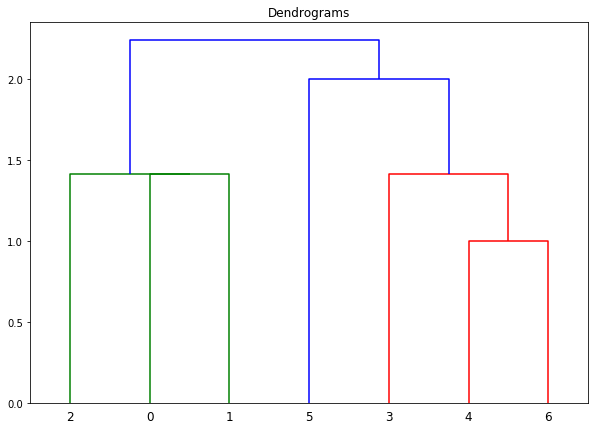

In [88]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cluster_data, method='single'))

## Hierarchical clusering in `sklearn`

In [89]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(cluster_data)
cluster_data['clusters'] = clustering.labels_
cluster_data['clusters'] = cluster_data['clusters'].astype('category')

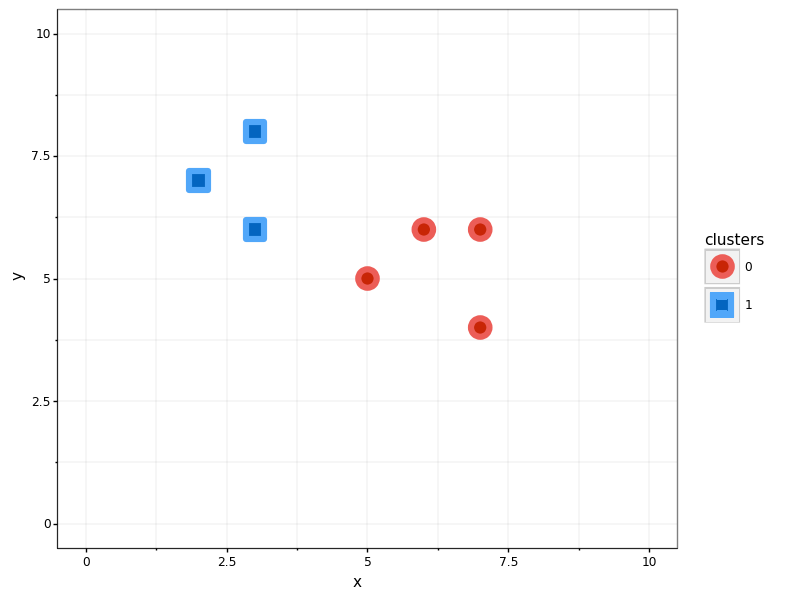

<ggplot: (-9223371916043211583)>

In [90]:
fig = (
    ggplot(data = cluster_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(colour = 'clusters', 
                   shape = 'clusters',
                   fill = 'clusters'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    xlim(0, 10) +
    ylim(0, 10) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (8, 7),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)

fig

In [91]:
# change the parameters as we can cut the tree earlier
clustering = AgglomerativeClustering(n_clusters = 7).fit(cluster_data)
cluster_data['clusters'] = clustering.labels_
cluster_data['clusters'] = cluster_data['clusters'].astype('category')

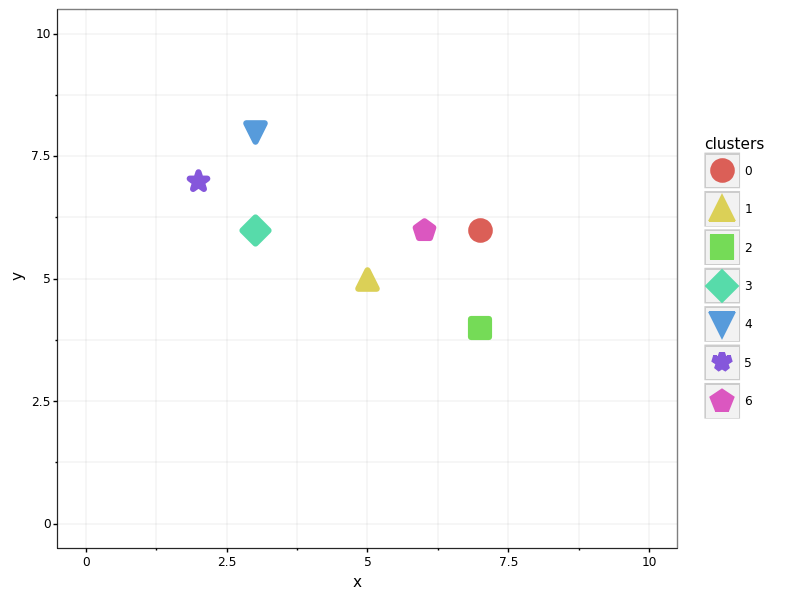

<ggplot: (120811608033)>

In [92]:
fig = (
    ggplot(data = cluster_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(colour = 'clusters', 
                   shape = 'clusters',
                   fill = 'clusters'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    xlim(0, 10) +
    ylim(0, 10) +
    theme_bw() + 
    theme(figure_size = (8, 7),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

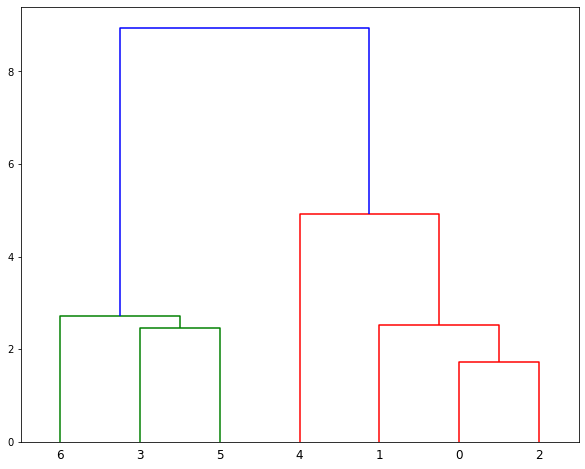

In [93]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(cluster_data)

plot_dendrogram(clustering, truncate_mode='level', p=3)

Let's go back to our lecture slides!

## K-Means

In [94]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3, random_state=0).fit(cluster_data)
cluster_data['clusters'] = clustering.labels_
cluster_data['clusters'] = cluster_data['clusters'].astype('category')

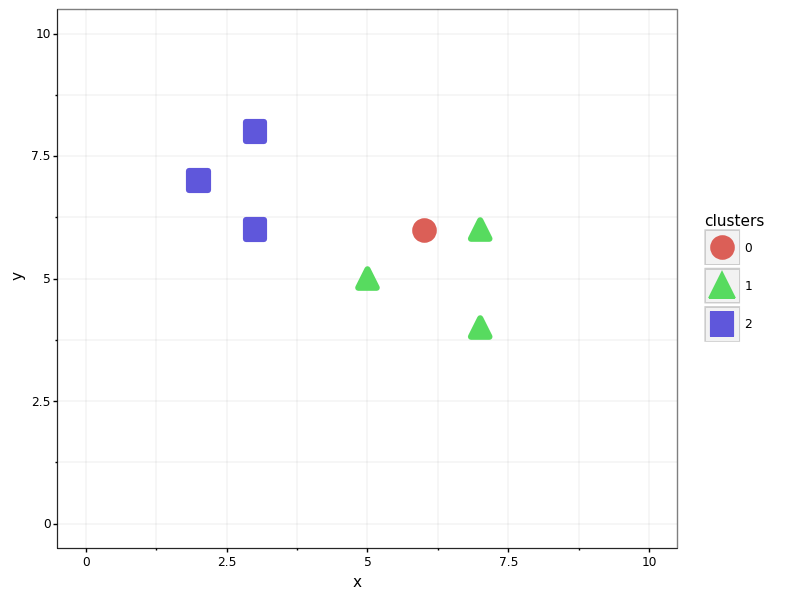

<ggplot: (-9223371916041039735)>

In [97]:
fig = (
    ggplot(data = cluster_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(colour = 'clusters', 
                   shape = 'clusters',
                   fill = 'clusters'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    xlim(0, 10) +
    ylim(0, 10) +
    theme_bw() +
    theme(figure_size = (8, 7),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

## Choosing the right number of clusters

In [189]:
cluster_data = pd.DataFrame({'x':[2,3,3,5,6,7,7], 'y':[7,6,8,5,6,4,6]})

The **rule of thumb** says that `sqrt(n/2)` is a good estimate.

In [190]:
np.sqrt(cluster_data.shape[0]/2)

1.8708286933869707

How many clusters we would end up having with **Elbow method**?

In [191]:
clustering = KMeans(n_clusters=1, random_state=0).fit(cluster_data)
print(clustering.cluster_centers_[0])

# Compute squared sum of errors or simply, a sum euclidean distances from all points to the centroid
# Use function dist
##### YOUR CODE STARTS #####

# sse = np.sum([ (point - clustering.cluster_centers_[0])**2 for point in np.array(cluster_data)])
sse = np.sum([ dist(point, clustering.cluster_centers_[0])**2 for point in np.array(cluster_data)])
print(sse)
##### YOUR CODE ENDS ##### (please do not delete this line)

[4.71428571 6.        ]
35.42857142857144


As always, `sklearn` is one step ahead of us...

In [192]:
clustering.inertia_

35.42857142857143

Let's go back to our lecture slides!

## Homework exercise 3 (4 points): Elbow method

<font color='red'>**(a)** Make a function that computes the squared sum of errors (SSE) for given clustering results. (2 points)

In [232]:
##### YOUR CODE STARTS #####
def compute_inertia(clustering, cluster_data):
    sse = np.zeros(len(clustering.cluster_centers_))
    sse = [(np.sqrt(np.sum((np.array(cluster_data)[i]-clustering.cluster_centers_[clustering.labels_[i]])**2)))**2 for i in range(len(cluster_data))]
    return(np.sum(sse))
##### YOUR CODE ENDS ##### (please do not delete this line)

Verify that your function works

In [233]:
clustering = KMeans(n_clusters=4, random_state=0).fit(cluster_data)
print(compute_inertia(clustering, cluster_data))
print(clustering.inertia_)

3.1666666666666665
3.1666666666666665


<font color='red'>**(b)** For each K compute corresponding inertia (or SSE) a and plot the **results**. (1 point)

In [234]:
K_options = [1, 2, 3, 4, 5, 6, 7]
##### YOUR CODE STARTS #####
inertia_vec = [compute_inertia(KMeans(n_clusters=K, random_state=0).fit(cluster_data), cluster_data) for K in K_options]
##### YOUR CODE ENDS ##### (please do not delete this line)
print(inertia_vec)

[35.42857142857144, 8.166666666666666, 5.333333333333333, 3.1666666666666665, 1.5000000000000002, 0.5, 0.0]


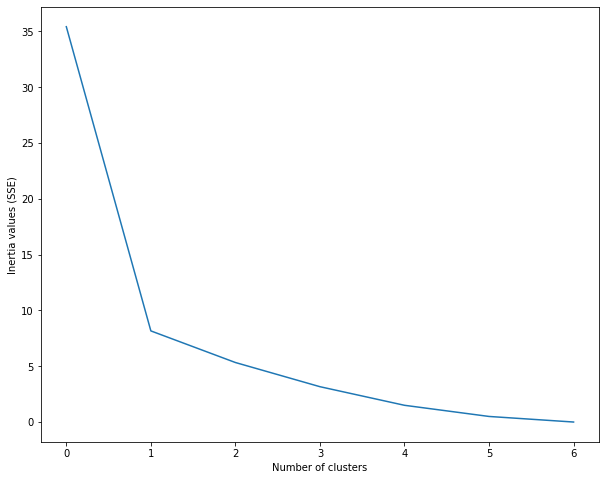

In [235]:
plt.plot(inertia_vec)
plt.ylabel('Inertia values (SSE)')
plt.xlabel('Number of clusters')
plt.show()

<font color='red'>**(c)** Looking at the figure you obtained in **(b)**, what is the most optimal number of clusters? Explain your choice. (1 point)

Answer to **(c)**: From this picture I could suggest that optimal number of clusters for given data is 2. On the chart we could see "elbow" in that point - line has drastic change in direction.

Note: X axis starts from 0, hence +1 need to be added to the value in order to get correct number of clusters.

## Clustering galery
Here we will indulge ourselves with comparing different clustering algorithms using a panel of interesting datasets.

In [332]:
from sklearn import datasets
n_samples = 100

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_circles_pd = pd.DataFrame({'x':noisy_circles[0][:,0], 'y':noisy_circles[0][:,1], 'clusters':noisy_circles[1]})
noisy_circles_pd['clusters'] = noisy_circles_pd['clusters'].astype('category')

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
noisy_moons_pd = pd.DataFrame({'x':noisy_moons[0][:,0], 'y':noisy_moons[0][:,1], 'clusters':noisy_moons[1]})
noisy_moons_pd['clusters'] = noisy_moons_pd['clusters'].astype('category')

no_structure = np.random.rand(n_samples, 2), None
no_structure_pd = pd.DataFrame({'x':no_structure[0][:,0], 'y':no_structure[0][:,1], 'clusters':np.zeros(len(no_structure[0]))})
no_structure_pd['clusters'] = no_structure_pd['clusters'].astype('category')


In [333]:
noisy_circles_pd['plot_id'] = 'circles'
noisy_moons_pd['plot_id'] = 'moons'
no_structure_pd['plot_id'] = 'nostructure'

noisy_data_pd = pd.concat([noisy_circles_pd, noisy_moons_pd, no_structure_pd], axis=0)
noisy_data_pd.shape
noisy_data_pd['plot_id'] = noisy_data_pd['plot_id'].astype('category')
noisy_data_pd['clusters'] = noisy_data_pd['clusters'].astype('category')

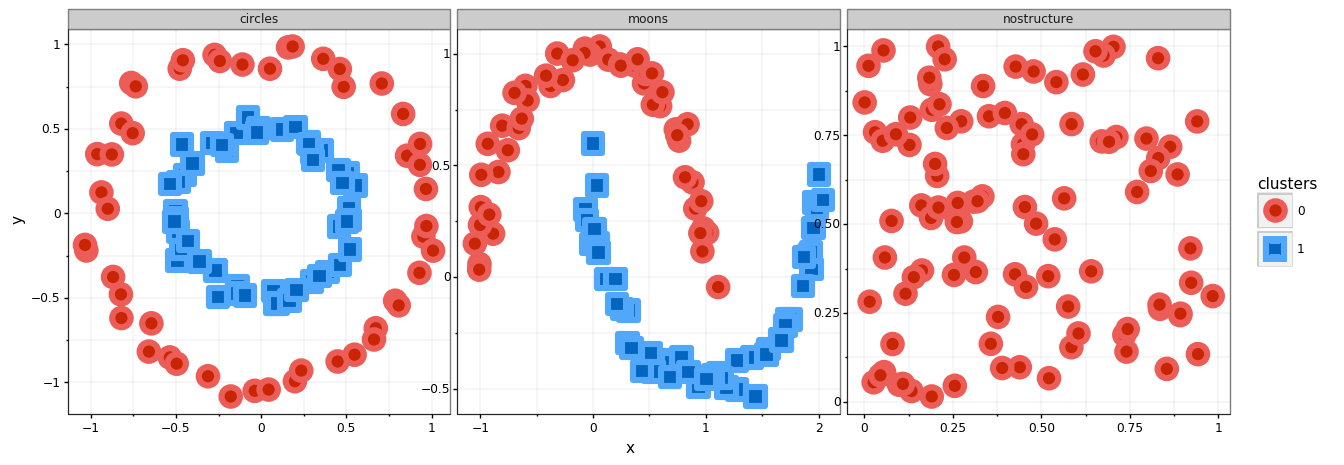

<ggplot: (120853279275)>

In [334]:
fig = (
    ggplot(data = noisy_data_pd,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(colour = 'clusters', 
                   shape = 'clusters',
                   fill = 'clusters'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() + 
    facet_wrap('~plot_id', scales = 'free') + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (15, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)

fig

Let's start our degustation from K-means

In [103]:
noisy_circles_pd['predicted'] = KMeans(n_clusters=2, random_state=0).fit(noisy_circles_pd[['x','y']]).labels_
noisy_moons_pd['predicted'] = KMeans(n_clusters=2, random_state=0).fit(noisy_moons_pd[['x','y']]).labels_
no_structure_pd['predicted'] = KMeans(n_clusters=2, random_state=0).fit(no_structure_pd[['x','y']]).labels_

noisy_data_pd = pd.concat([noisy_circles_pd, noisy_moons_pd, no_structure_pd], axis=0)
noisy_data_pd.shape
noisy_data_pd['plot_id'] = noisy_data_pd['plot_id'].astype('category')
noisy_data_pd['clusters'] = noisy_data_pd['clusters'].astype('category')
noisy_data_pd['predicted'] = noisy_data_pd['predicted'].astype('category')

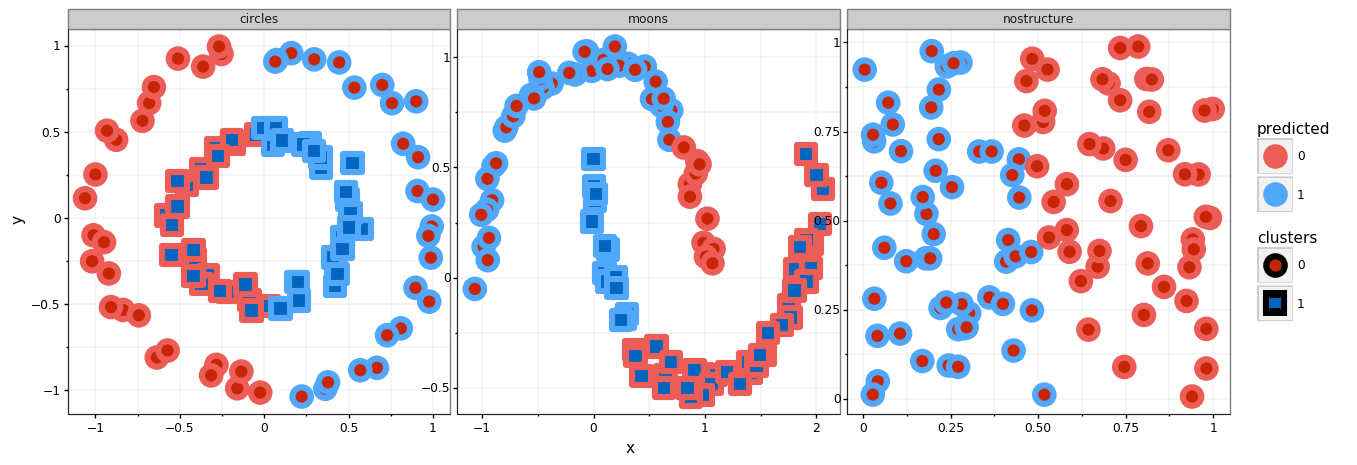

<ggplot: (115656277438)>

In [105]:
fig = (
    ggplot(data = noisy_data_pd,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(colour = 'predicted', 
                   shape = 'clusters',
                   fill = 'clusters'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() + 
    facet_wrap('~plot_id', scales = 'free') + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (15, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)

fig

Here is a time for some hierarchical clustering

In [106]:
noisy_circles_pd['predicted'] = AgglomerativeClustering(n_clusters = 2).fit(noisy_circles_pd[['x','y']]).labels_
noisy_moons_pd['predicted'] = AgglomerativeClustering(n_clusters = 2).fit(noisy_moons_pd[['x','y']]).labels_
no_structure_pd['predicted'] = AgglomerativeClustering(n_clusters = 2).fit(no_structure_pd[['x','y']]).labels_

noisy_data_pd = pd.concat([noisy_circles_pd, noisy_moons_pd, no_structure_pd], axis=0)
noisy_data_pd.shape
noisy_data_pd['plot_id'] = noisy_data_pd['plot_id'].astype('category')
noisy_data_pd['clusters'] = noisy_data_pd['clusters'].astype('category')
noisy_data_pd['predicted'] = noisy_data_pd['predicted'].astype('category')

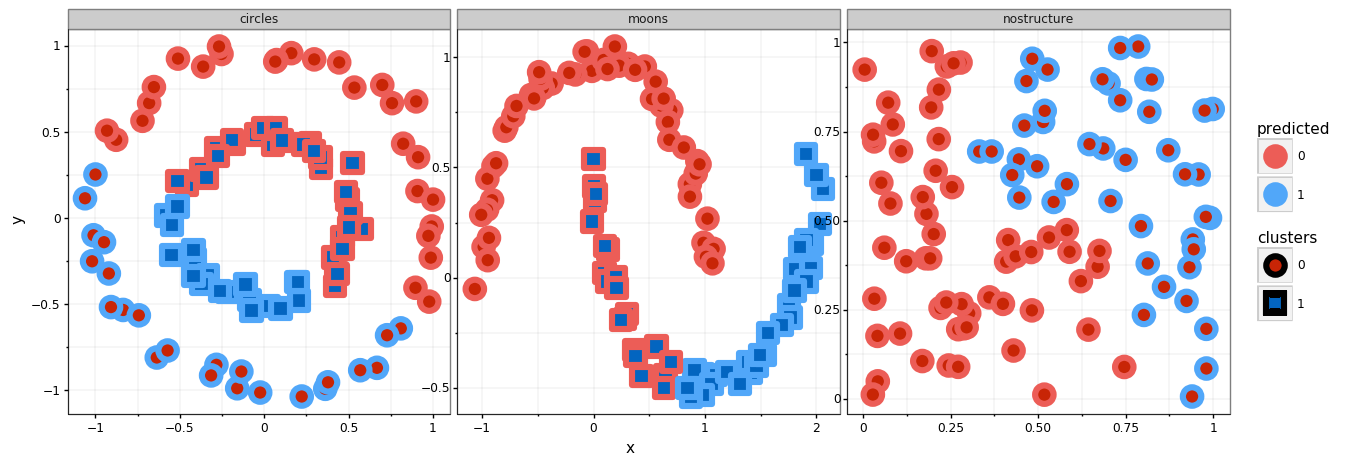

<ggplot: (115655286904)>

In [107]:
fig = (
    ggplot(data = noisy_data_pd,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(colour = 'predicted', 
                   shape = 'clusters',
                   fill = 'clusters'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() + 
    facet_wrap('~plot_id', scales = 'free') + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (15, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)

fig

Let's apply DBSCAN as well, as it surely implemented in the `sklearn` package as well. Bellow implement DBSCAN with default parameters (eps = 3 and min_samples = 2).

In [108]:
from sklearn.cluster import DBSCAN
##### YOUR CODE STARTS #####
noisy_circles_pd['predicted'] = DBSCAN().fit(noisy_circles_pd[['x','y']]).labels_
noisy_moons_pd['predicted'] = DBSCAN().fit(noisy_moons_pd[['x','y']]).labels_
no_structure_pd['predicted'] = DBSCAN().fit(no_structure_pd[['x','y']]).labels_
##### YOUR CODE ENDS ##### (please do not delete this line)

noisy_data_pd = pd.concat([noisy_circles_pd, noisy_moons_pd, no_structure_pd], axis=0)
noisy_data_pd.shape
noisy_data_pd['plot_id'] = noisy_data_pd['plot_id'].astype('category')
noisy_data_pd['clusters'] = noisy_data_pd['clusters'].astype('category')
noisy_data_pd['predicted'] = noisy_data_pd['predicted'].astype('category')

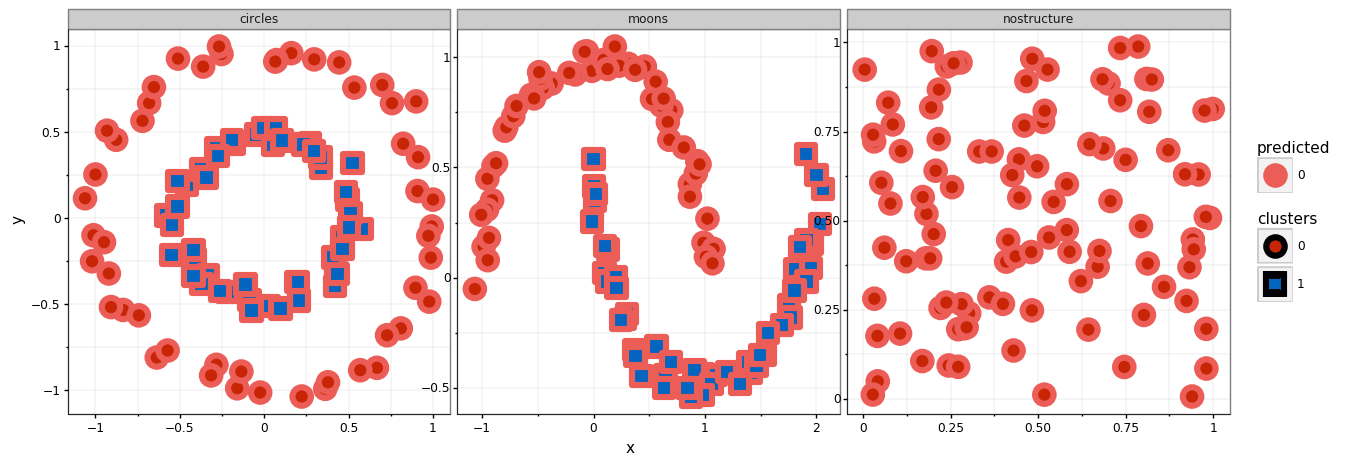

<ggplot: (-9223371921199276856)>

In [109]:
fig = (
    ggplot(data = noisy_data_pd,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(colour = 'predicted', 
                   shape = 'clusters',
                   fill = 'clusters'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() + 
    facet_wrap('~plot_id', scales = 'free') + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (15, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)

fig

Oops... Something isn't right. What is going on here?

In [112]:
from sklearn.cluster import DBSCAN
##### YOUR CODE STARTS #####
noisy_circles_pd['predicted'] = DBSCAN(eps=0.32).fit(noisy_circles_pd[['x','y']]).labels_
noisy_moons_pd['predicted'] = DBSCAN(eps=0.32).fit(noisy_moons_pd[['x','y']]).labels_
no_structure_pd['predicted'] = DBSCAN(eps=0.32).fit(no_structure_pd[['x','y']]).labels_
##### YOUR CODE ENDS ##### (please do not delete this line)

noisy_data_pd = pd.concat([noisy_circles_pd, noisy_moons_pd, no_structure_pd], axis=0)
noisy_data_pd.shape
noisy_data_pd['plot_id'] = noisy_data_pd['plot_id'].astype('category')
noisy_data_pd['clusters'] = noisy_data_pd['clusters'].astype('category')
noisy_data_pd['predicted'] = noisy_data_pd['predicted'].astype('category')

C:\Users\Mykhaylo_Manukyan\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\scales\scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 2 values. 3 were requested from it.
  warn(msg.format(max_n, n), PlotnineWarning)
C:\Users\Mykhaylo_Manukyan\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 10 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
C:\Users\Mykhaylo_Manukyan\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\scales\scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 2 values. 3 were requested from it.
  warn(msg.format(max_n, n), PlotnineWarning)
C:\Users\Mykhaylo_Manukyan\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\guides\guides.py:261: PlotnineWarning: geom_point legend : Removed 1 rows containing missing values.
  gdef = gdef.create_geoms(plot)


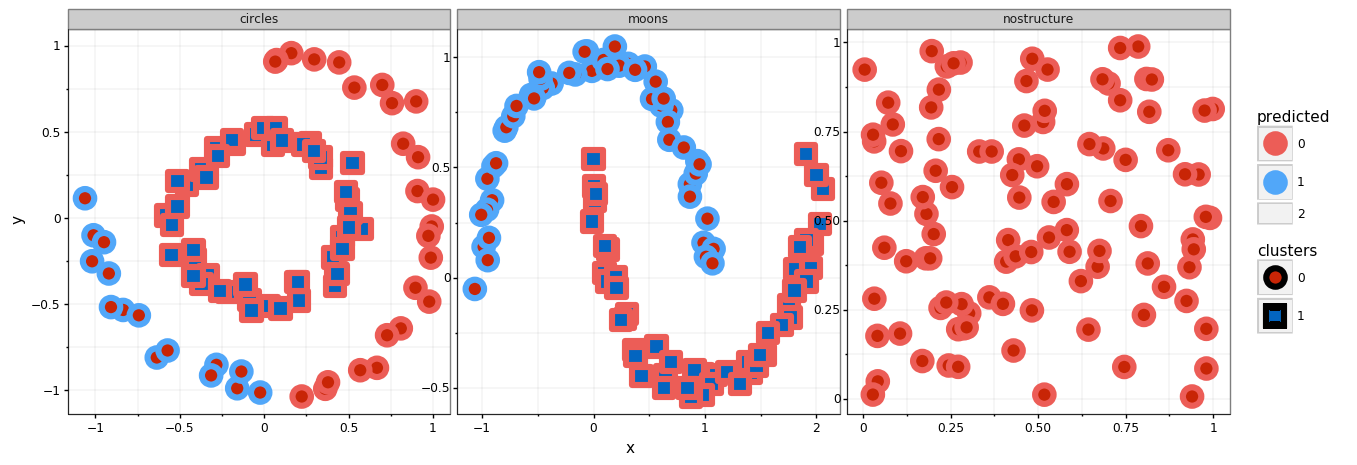

<ggplot: (115655840253)>

In [113]:
fig = (
    ggplot(data = noisy_data_pd,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(colour = 'predicted', 
                   shape = 'clusters',
                   fill = 'clusters'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() + 
    facet_wrap('~plot_id', scales = 'free') + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (15, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)

fig

The End.

# Bonus exercises
*(NB, these are optional exercises!)*

## Bonus exercise 1 (2 bonus points):

<font color='red'> Apply t-SNE or UMAP on MNIST data, plot the results as we have done for PCA. Visually compare the results. Which one in your opinion worked better? What are the advantages and disadvantages of these methods? </font> 

In [305]:
import umap

train_images = pd.DataFrame(np.matrix(train_images))
train_images = train_images - train_images.mean()

test_images = pd.DataFrame(np.matrix(test_images))
test_images = test_images - test_images.mean()

trans_super = umap.UMAP(n_neighbors=5, random_state=7, min_dist=0.001).fit(train_images, train_labels)

trans_unsuper = umap.UMAP(n_neighbors=5, random_state=7, min_dist=0.001).fit(train_images)

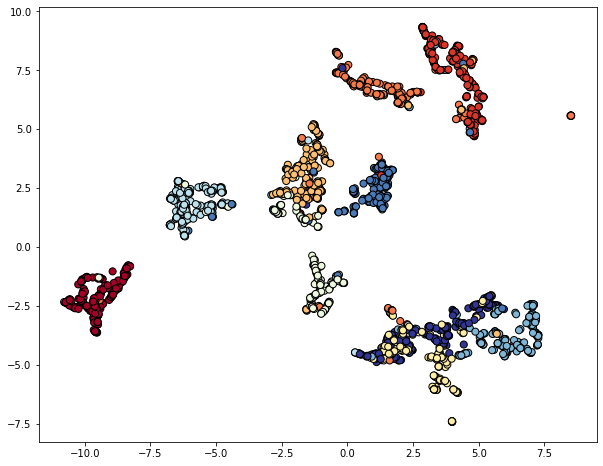

In [306]:
# visualize unsupervised UMAP
visualise_train = pd.DataFrame({'E1':np.array(trans_unsuper.embedding_[:,0]), 'E2':np.array(trans_unsuper.embedding_[:,1])})

cm = plt.cm.get_cmap('RdYlBu')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

plt.scatter(visualise_train.E1, visualise_train.E2, s=50, edgecolors = 'black', cmap=cm, c=train_labels)
plt.show()

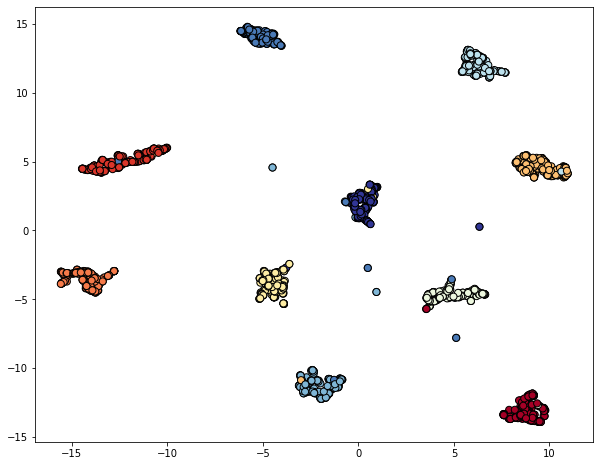

In [307]:
# visualize supervised UMAP
visualise_train = pd.DataFrame({'E1':np.array(trans_super.embedding_[:,0]), 'E2':np.array(trans_super.embedding_[:,1])})

cm = plt.cm.get_cmap('RdYlBu')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

plt.scatter(visualise_train.E1, visualise_train.E2, s=50, edgecolors = 'black', cmap=cm, c=train_labels)
plt.show()

If we compare results of unsupervised UMAP and PCA on MNIST dataset visualization we could see easily that UMAP manage to separate data in more isolated clusters. There are still however some mixture of poits from different classes in some places, but in general there are obvious clusters just from visual inspection. When we are looking into visualization produced by PCA - we could not do it easily because all points are located clos to each other and clusters are not obvious there. 

Supervised UMAP (called with labels) able to isolated almost all points perfectly with very few exceptions.

Advantages:
* UMAP method is fast one even for data with huge amount of dimensions.
* UMAP works well as pre-processing technique for clustering algorithms and other ML techniques. 
* UMAP preserves better local neighbor relations while providing a better big picture view.
* Support of wide variety of distance functions.
* UMAP supports supervised dimension reduction with labels (see second visualization)
* UMAP based on theoretical background of manifold learning.

Disadvantages:
* UMAP lack of maturity since it is a new player in dimensionality-reduction league (since 2018). As result best practices not yet robust.
* Same as with PCA - after transformation it is not possible to interpret data anymore in a meaningful way.
* Unlike PCA, UMAP transformation is not revertible - means we could not go back to original data.

## Bonus exercise 2 (2 bonus points):

<font color='red'> Use the output of bonus exercise 1 (either from t-SNE or UMAP) to train your favourite ML model and compare its performance with the same model trained on the original data and on data transformed with conventional PCA. What differences you observe and why? </font> 

In [330]:
from sklearn import svm #importing liblrary to perform SVM classification

# performing classification on original data
clf = svm.SVC(kernel='rbf')
clf.fit(train_images, train_labels)

n_correct = np.sum(clf.predict(test_images) == test_labels) # assess model accuracy

print("Accuracy of SVC on original data: " + "{:.2%}".format(n_correct/len(test_labels)) )

# performing classification on PCA transformed data
pca = PCA() # performing PCA
train_images_new = pca.fit_transform(train_images).T

variances = pca.explained_variance_ratio_ #selecting optimal amount of features to use
com_vars = np.cumsum(variances)
n_pc = np.min(np.where(np.array(com_vars) > 0.9))
print("Number of PCA components to use: %s" %n_pc)

clf_pca = svm.SVC(kernel='rbf')
clf_pca.fit(train_images_new[0:n_pc,:].T, train_labels)

test_images_new = np.dot(np.matrix(pca.components_), test_images.T)
n_correct = np.sum(clf_pca.predict(test_images_new[0:n_pc,:].T) == test_labels)
print("Accuracy of SVC on PCA transformed data: " + "{:.2%}".format(n_correct/len(test_labels)) )

# UMAP unsupervised classification

# tranforming data using UMAP. I choose number of components equal to number of classes.
trans_unsuper = umap.UMAP(n_neighbors=5, random_state=7, min_dist=0.001, n_components=10).fit(train_images)
train_images_umap = trans_unsuper.transform(train_images)
test_images_umap = trans_unsuper.transform(test_images)

clf_umap = svm.SVC(kernel='rbf')
clf_umap.fit(train_images_umap, train_labels)

n_correct = np.sum(clf_umap.predict(test_images_umap) == test_labels)
print("Accuracy of SVC on unsupervised UMAP transformed data: " + "{:.2%}".format(n_correct/len(test_labels)) )

# UMAP supervised classification

# tranforming data using UMAP. I choose number of components equal to number of classes.
trans_super = umap.UMAP(n_neighbors=5, random_state=7, min_dist=0.001, n_components=10).fit(train_images, train_labels)
train_images_umap = trans_super.transform(train_images)
test_images_umap = trans_super.transform(test_images)

clf_umap = svm.SVC(kernel='rbf')
clf_umap.fit(train_images_umap, train_labels)

n_correct = np.sum(clf_umap.predict(test_images_umap) == test_labels)
print("Accuracy of SVC on supervised UMAP transformed data: " + "{:.2%}".format(n_correct/len(test_labels)) )

Accuracy of SVC on original data: 92.20%
Number of PCA components to use: 78
Accuracy of SVC on PCA transformed data: 92.60%
Accuracy of SVC on unsupervised UMAP transformed data: 82.40%
Accuracy of SVC on supervised UMAP transformed data: 88.20%


As result we could observe that model accuracy has improved slightly when PCA transformed data is used. But improvement is very minor (<1%). However, when I am training a model based on UMAP transformed data - model accuracy decrease compare to original data. This is valid for both - supervised and unsupervised UMAP transformations. I think this happens because UMAP suits better when data need to be visualized in 2D or 3D spaces, but doesn't preserve exact distances. That is why it has less accuracy compare to original and PCA data when classifier is used. Also, if we use supervised UMAP (trained with labels) we could get almost same performance.

## Bonus exercise 3 (2 bonus points):

<font color='red'> Pick one more clustering method the `sklearn`, run it on the three datasets we used before (moons, circles and without a structure). Visualise the performance of this new method. And in a few sentences sufficiently explain its principles. </font> 

In [342]:
from sklearn import datasets
n_samples = 100

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_circles_pd = pd.DataFrame({'x':noisy_circles[0][:,0], 'y':noisy_circles[0][:,1], 'clusters':noisy_circles[1]})
noisy_circles_pd['clusters'] = noisy_circles_pd['clusters'].astype('category')

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
noisy_moons_pd = pd.DataFrame({'x':noisy_moons[0][:,0], 'y':noisy_moons[0][:,1], 'clusters':noisy_moons[1]})
noisy_moons_pd['clusters'] = noisy_moons_pd['clusters'].astype('category')

no_structure = np.random.rand(n_samples, 2), None
no_structure_pd = pd.DataFrame({'x':no_structure[0][:,0], 'y':no_structure[0][:,1], 'clusters':np.zeros(len(no_structure[0]))})
no_structure_pd['clusters'] = no_structure_pd['clusters'].astype('category')

In [343]:
noisy_circles_pd['plot_id'] = 'circles'
noisy_moons_pd['plot_id'] = 'moons'
no_structure_pd['plot_id'] = 'nostructure'

noisy_data_pd = pd.concat([noisy_circles_pd, noisy_moons_pd, no_structure_pd], axis=0)
noisy_data_pd.shape
noisy_data_pd['plot_id'] = noisy_data_pd['plot_id'].astype('category')
noisy_data_pd['clusters'] = noisy_data_pd['clusters'].astype('category')

In [352]:
from sklearn.cluster import OPTICS

noisy_circles_pd['predicted'] = OPTICS(xi=0.37).fit(noisy_circles_pd[['x','y']]).labels_
noisy_moons_pd['predicted'] = OPTICS(xi=0.37).fit(noisy_moons_pd[['x','y']]).labels_
no_structure_pd['predicted'] = OPTICS(xi=0.37).fit(no_structure_pd[['x','y']]).labels_

noisy_data_pd = pd.concat([noisy_circles_pd, noisy_moons_pd, no_structure_pd], axis=0)
noisy_data_pd.shape
noisy_data_pd['plot_id'] = noisy_data_pd['plot_id'].astype('category')
noisy_data_pd['clusters'] = noisy_data_pd['clusters'].astype('category')
noisy_data_pd['predicted'] = noisy_data_pd['predicted'].astype('category')

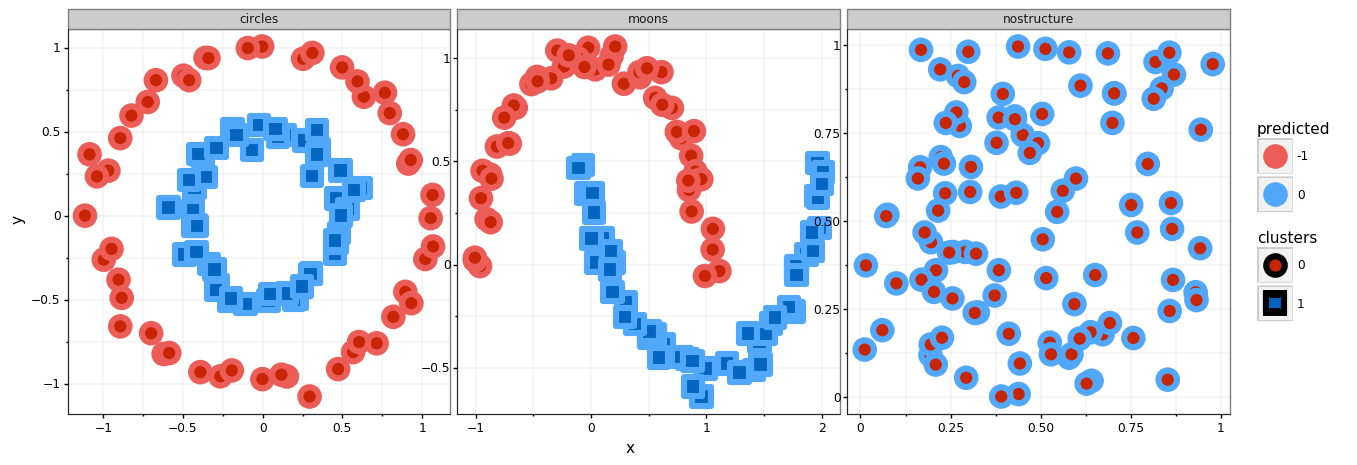

<ggplot: (-9223371916032321448)>

In [353]:
fig = (
    ggplot(data = noisy_data_pd,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(colour = 'predicted', 
                   shape = 'clusters',
                   fill = 'clusters'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() + 
    facet_wrap('~plot_id', scales = 'free') + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (15, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)

fig

OPTICS algorithm is similar to DBSCAN algorithm and could be considered as generalazition of DBSCAN where eps value is no longer a single parameter and rather a value range. Main difference between OPTICS and DBSCAN is that optics build a reachability graph where each point has reachability distance and cluster ordering spot. This attributesd assigned during model fitting and used to determine cluster membership. Combining reachability distance and ordering we could built a reachability plot with point density on Y-axis and points are ordered such that nearby are adjastnt. If we cut a plot at single value - we will get DBSCAN like results. All points above cut line classified as noice. When plot read from left to right - new cluster emerge when there is a break. Parameter xi represents a step slope value, which is used to find clusters withon a graph.

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions: 
* how much time did you send on this homework?
* was it too hard/easy for you?
* what would you suggest to add or remove?
* anything else you would like to tell us

Your comments:
* how much time did you send on this homework?
Answer: Around 8 hours in total doing it in relaxed way with distractions.
* was it too hard/easy for you?
Answer: It was an easy one. I was only confused by SSE calculation until I read how inertia calculatted inside scikit.
* what would you suggest to add or remove?
Answer: This is tough question. I've enjoy working with PCA and UMAP. Maybe you could consider to add some use case which is completely crap without PCA, and only possible with PCA. Also I like kaggle exrcise in first homework. I know that no kaggle exist for unsupervised learning, but I think some kaggle like task would be nice. By saying kaggle like I mean a task which we are free to choose how to approach. 
* anything else you would like to tell us
Answer: Just "Thank you!". Amazing course so far. I really like DL lesson - this is something I know a bit. In general - I would like to know more about practical application of different techniques. Would be cool to have answers to questions "When to use what?" and "What will work and what won't?"
